In [1]:
# Plotting fraction of planetesimals differentiated as a function of time (Al26)
# Based on scripts from Tim L 15/08/2021
#
# Script from: https://github.com/timlichtenberg/2stage_scripts_data
# Part of the combined repository: https://osf.io/e2kfv/

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import os, math, sys, glob, struct
import numpy as np
import csv

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, DrawingArea, HPacker, VPacker
import pickle
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
from numpy.random import uniform, seed
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from shutil import copyfile
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from matplotlib.ticker import NullFormatter
import astropy
from astropy import stats as astrostats
import pandas as pd
import scipy
from scipy.interpolate import griddata
import matplotlib.patheffects as path_effects
from cycler import cycler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import interpolate
from natsort import natsorted

fscale  = 3.5
fsize   = 22
sns.set(font_scale=fscale)

sns.axes_style("white")
sns.set_style("ticks")

# Working directories
working_dir = os.getcwd()


dat_dir     = working_dir+"/data/planetesimal_evolution/"
fig_dir     = working_dir+"/figures/"

df = pd.read_csv(dat_dir+"plts_all_data.csv")

# Check if data was already read in
if os.path.isfile(dat_dir+"plts_all_data.csv"):
    df = pd.read_csv(dat_dir+"plts_all_data.csv")
else:

    # Select files
    FILES       = [ "r???t???al05250fe01150tmp150.dat" ] #r??0p??ht???

    os.chdir(dat_dir)
    FILE_LIST   = []
    for i in range(0,len(FILES)):
        glob_runs=glob.glob(FILES[i])
        for item in glob_runs:
            FILE_LIST.append(item)

    print (FILE_LIST)

    df = pd.DataFrame(index=["run","rad","tform","time","sol_frac","liq_frac","hydrous_frac","primitive_frac","n2co2_frac","cocl_frac","h2o_frac","phyllo1_frac","phyllo2_frac","phyllo3_frac","phyllo4_frac","perco_frac","melt1_frac","melt2_frac","maxtk","t_max_body","meantk","t_mean_body","count_toohot"])

    for FILE in FILE_LIST:

        # Get the settings of the current file
        RUN      = str(FILE[:-4])
        r_init   = float(RUN[1:4])          # km
        t_form   = float(RUN[5:8])*1e-2     # Myr
        al_init  = float(RUN[10:15])*1e-8   # 26Al/27Al # to normalize: /5.25e-5
        # t_form   = abs(-1.0344*np.log(al_init/5.25e-5))  # Myr

        # print FILE, r_init, t_form, al_init

        # Open a file
        file_name=dat_dir+FILE

        print (file_name)

        df2 = pd.read_csv(file_name, sep=" ", names=["time","sol_frac","liq_frac","hydrous_frac","primitive_frac","n2co2_frac","cocl_frac","h2o_frac","phyllo1_frac","phyllo2_frac","phyllo3_frac","phyllo4_frac","perco_frac","melt1_frac","melt2_frac","maxtk","t_max_body","meantk","t_mean_body","count_toohot"])
        # https://www.interviewqs.com/ddi_code_snippets/add_new_col_df_default_value
        df2.insert(0, "run", RUN)
        df2.insert(1, "rad", r_init)
        df2.insert(2, "tform", t_form)

        # df2["rad"] = r_init
        # df2["tform"] = t_form

        df = df.append(df2, sort=False)
        df = df.dropna()

    # Save to csv
    df.to_csv(dat_dir+"plts_all_data.csv")

RUN_LIST = natsorted(set(df.run.tolist()))


recalc = 0
if (os.path.isfile(dat_dir+"grid_parameter_space.csv")) and (recalc == 0):
    with open(dat_dir+"grid_parameter_space.csv", 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        grid_parameter_space = []
        for row in csvreader:
            grid_parameter_space.append(row)

        rad             = [ float(k) for k in grid_parameter_space[0]]
        tform           = [ float(k) for k in grid_parameter_space[1]]
        sol_frac        = [ float(k) for k in grid_parameter_space[2]]
        liq_frac        = [ float(k) for k in grid_parameter_space[3]]
        hydrous_frac    = [ float(k) for k in grid_parameter_space[4]]
        primitive_frac  = [ float(k) for k in grid_parameter_space[5]]
        n2co2_frac      = [ float(k) for k in grid_parameter_space[6]]
        cocl_frac       = [ float(k) for k in grid_parameter_space[7]]
        h2o_frac        = [ float(k) for k in grid_parameter_space[8]]
        # phyllo1_frac,
        # phyllo2_frac,
        # phyllo3_frac,
        # phyllo4_frac,
        perco_frac      = [ float(k) for k in grid_parameter_space[9]]
        melt1_frac      = [ float(k) for k in grid_parameter_space[10]]
        melt2_frac      = [ float(k) for k in grid_parameter_space[11]]
        Tmax_grid       = [ float(k) for k in grid_parameter_space[12]]
        Tmean_markers   = [ float(k) for k in grid_parameter_space[13]]

else:

    rad             = list([])
    tform           = list([])
    al              = list([])
    sol_frac        = list([])
    liq_frac        = list([])
    hydrous_frac    = list([])
    primitive_frac  = list([])
    n2co2_frac      = list([])
    cocl_frac       = list([])
    h2o_frac        = list([])
    # phyllo1_frac    = list([])
    # phyllo2_frac    = list([])
    # phyllo3_frac    = list([])
    # phyllo4_frac    = list([])
    perco_frac      = list([])
    melt1_frac      = list([])
    melt2_frac      = list([])
    Tmax_grid       = list([])
    Tmean_markers   = list([])

    # for FILE in FILE_LIST:
    for RUN in RUN_LIST:

        # Get the settings of the current file
        # RUN      = str(FILE[:-4])
        r_init   = float(RUN[1:4])         # km
        t_init   = float(RUN[5:8])/100    # Myr
        al_init  = float(RUN[10:15])*1e-8/5.25e-5  # 26Al/27Al # to normalize: /5.25e-5
        fe_init  = float(RUN[17:22])*1e-11 # 60Fe/56Fe
        tmp_init = float(RUN[25:28])       # K
        # t_current = str(round(Time/1e6,2))

        print ("### Analyse:", RUN, r_init, t_init, al_init, fe_init, tmp_init)

        sol_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['sol_frac']-0.0).abs().argsort()[:1]].sol_frac.tolist()[0]

        liq_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['liq_frac']-1.0).abs().argsort()[:1]].liq_frac.tolist()[0]

        hydrous_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['time']-1.0).abs().argsort()[:1]].hydrous_frac.tolist()[0]

        primitive_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['time']-10.0).abs().argsort()[:1]].primitive_frac.tolist()[0]

        n2co2_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['time']-10.0).abs().argsort()[:1]].n2co2_frac.tolist()[0]

        cocl_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['time']-10.0).abs().argsort()[:1]].cocl_frac.tolist()[0]

        h2o_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['time']-10.0).abs().argsort()[:1]].h2o_frac.tolist()[0]

        perco_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['perco_frac']-1.0).abs().argsort()[:1]].perco_frac.tolist()[0]

        melt1_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['melt1_frac']-1.0).abs().argsort()[:1]].melt1_frac.tolist()[0]

        melt2_frac_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['melt2_frac']-1.0).abs().argsort()[:1]].melt2_frac.tolist()[0]

        Tmax_grid_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['maxtk']-5000.0).abs().argsort()[:1]].maxtk.tolist()[0]

        Tmean_markers_value = df[df['run']==RUN].iloc[(df[df['run']==RUN]['t_mean_body']-5000.0).abs().argsort()[:1]].t_mean_body.tolist()[0]

        # plot_quantity = perco_frac_max

        # Parameter space
        rad.append(r_init)
        tform.append(t_init)

        # Define values
        sol_frac.append(sol_frac_value)
        liq_frac.append(liq_frac_value)
        hydrous_frac.append(hydrous_frac_value)
        primitive_frac.append(primitive_frac_value)
        n2co2_frac.append(n2co2_frac_value)
        cocl_frac.append(cocl_frac_value)
        h2o_frac.append(h2o_frac_value)
        # phyllo1_frac.append()
        # phyllo2_frac.append()
        # phyllo3_frac.append()
        # phyllo4_frac.append()
        perco_frac.append(perco_frac_value)
        melt1_frac.append(melt1_frac_value)
        melt2_frac.append(melt2_frac_value)
        Tmax_grid.append(Tmax_grid_value)
        Tmean_markers.append(Tmean_markers_value)

    # https://stackoverflow.com/questions/14037540/writing-a-python-list-of-lists-to-a-csv-file
    # https://docs.python.org/2/library/csv.html
    grid_parameter_space = [
                                rad,
                                tform,
                                sol_frac,
                                liq_frac,
                                hydrous_frac,
                                primitive_frac,
                                n2co2_frac,
                                cocl_frac,
                                h2o_frac,
                                # phyllo1_frac,
                                # phyllo2_frac,
                                # phyllo3_frac,
                                # phyllo4_frac,
                                perco_frac,
                                melt1_frac,
                                melt2_frac,
                                Tmax_grid,
                                Tmean_markers
                            ]

    print(grid_parameter_space)
    with open(dat_dir+"grid_parameter_space.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(grid_parameter_space)

rad                 = np.asarray(rad)
tform               = np.asarray(tform)
sol_frac            = np.asarray(sol_frac)
liq_frac            = np.asarray(liq_frac)
hydrous_frac        = np.asarray(hydrous_frac)
primitive_frac      = np.asarray(primitive_frac)
n2co2_frac          = np.asarray(n2co2_frac)
cocl_frac           = np.asarray(cocl_frac)
h2o_frac            = np.asarray(h2o_frac)
perco_frac          = np.asarray(perco_frac)
melt1_frac          = np.asarray(melt1_frac)
melt2_frac          = np.asarray(melt2_frac)
Tmax_grid           = np.asarray(Tmax_grid)
Tmean_markers       = np.asarray(Tmean_markers)

# define grid.
xi = np.linspace(min(rad), max(rad), 100)
yi = np.linspace(min(tform), max(tform), 100)



grid_x, grid_y = np.mgrid[min(rad):max(rad):100j, min(tform):max(tform):100j]

points = np.stack([rad, tform], axis=1)


# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
zi_sol_frac = scipy.interpolate.griddata(points, sol_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_liq_frac = scipy.interpolate.griddata(points, liq_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_hydrous_frac = scipy.interpolate.griddata(points, hydrous_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_primitive_frac = scipy.interpolate.griddata(points, primitive_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_n2co2_frac = scipy.interpolate.griddata(points, n2co2_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_cocl_frac = scipy.interpolate.griddata(points, cocl_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_h2o_frac = scipy.interpolate.griddata(points, h2o_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_perco_frac = scipy.interpolate.griddata(points, perco_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_melt1_frac = scipy.interpolate.griddata(points, melt1_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_melt2_frac = scipy.interpolate.griddata(points, melt2_frac, (grid_x, grid_y), method='linear', rescale=False)
zi_Tmax_grid = scipy.interpolate.griddata(points, Tmax_grid, (grid_x, grid_y), method='linear', rescale=False)
zi_Tmean_markers = scipy.interpolate.griddata(points, Tmean_markers, (grid_x, grid_y), method='linear', rescale=False)

zi_list = [ "zi_Tmax_grid", "zi_perco_frac" ]

# PLOT SETTINGS
label_font      = 22
tick_font       = 20
annotate_font   = 16
lw              = 10
tw              = 1.5

# loop over settings
for zi in zi_list:
    print (zi)

    
# testing

zi=zi_Tmax_grid


zi_Tmax_grid
zi_perco_frac


No handles with labels found to put in legend.


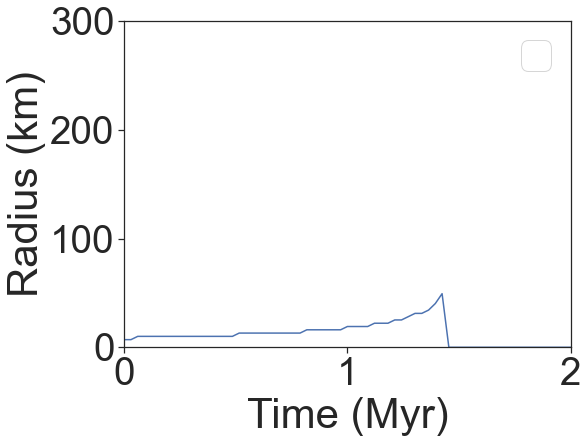

In [3]:
index_min=np.zeros(100)
min_r=np.zeros(100)
zti=np.transpose(zi)


for i in range(0,100):
        dd=np.where(zi[:,i]>1273)
        if np.size(dd)>0:
            index_min[i]=np.min(dd)
            min_r[i]=xi[np.min(dd)]
            

            

fig, ax = plt.subplots(figsize=(8, 6))   
plt.plot( yi, min_r)
ax.set_ylim((0,300))
ax.set_xlim((0,2.))


ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Radius (km)')

ax.legend()
plt.savefig("/Users/amy/Documents/backup_datadir/projects/checkout_python_repos/python_repos/al26/minr_time.pdf")


plt.show()

Initial Al26 0.0005
1.7128841459067066 , 2.404681200021437
1.7431871762097366 , 2.404681200021437
1.7734902065127671 , 0.9850046919741693
1.8037932368157972 , 0.9850046919741693
1.8340962671188275 , 0.9850046919741693
1.864399297421858 , 0.9850046919741693
1.894702327724888 , 0.9850046919741693
1.9250053580279185 , 0.9850046919741693
1.955308388330949 , 0.9850046919741693
1.9856114186339788 , 0.9850046919741693
2.0159144489370098 , 0.9850046919741693
2.0462174792400396 , 0.9850046919741693
2.07652050954307 , 0.9850046919741693
2.1068235398461 , 0.9850046919741693
2.1371265701491304 , 0.9850046919741693
2.1674296004521607 , 0.9850046919741693
2.1977326307551914 , 0.9850046919741693
2.2280356610582213 , 0.5108921494102007
2.258338691361252 , 0.5108921494102007
2.2886417216642823 , 0.5108921494102007
2.3189447519673125 , 0.5108921494102007
2.349247782270343 , 0.5108921494102007
2.379550812573373 , 0.5108921494102007
2.4098538428764034 , 0.5108921494102007
2.4401568731794336 , 0.5108921494

<ipython-input-8-88feca766495>:12: RuntimeWarning: divide by zero encountered in power
  ndiff = (rmax**(-2.5) - (1e3*rdiff)**(-2.5))/ (rmax**(-2.5)- rmin**(-2.5))


Text(0, 0.5, 'Fraction of bodies differentiated')

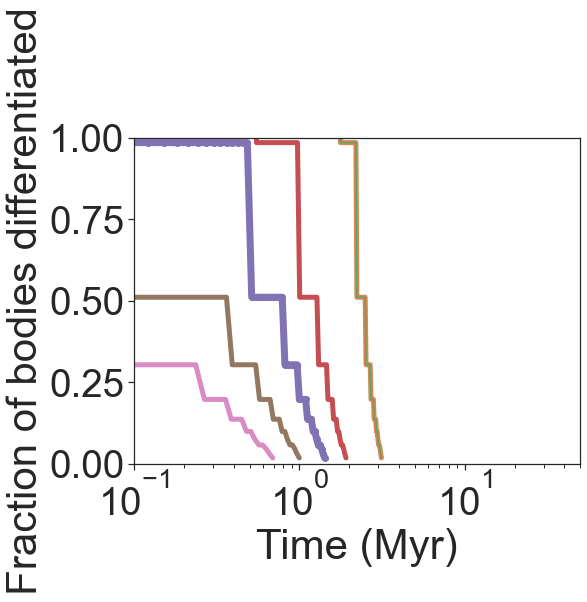

In [8]:
##  This makes a rough version of Fig 2 and prints the data required



rmin=10.e3
rmax=300e3

alpha=-3.5
rdiff=min_r
time_array=yi


## number of bodies with r> rdiff


ndiff = (rmax**(-2.5) - (1e3*rdiff)**(-2.5))/ (rmax**(-2.5)- rmin**(-2.5))


fig, ax = plt.subplots(figsize=(8, 6))   
plt.plot(time_array, ndiff)



## SS
al26_27_0= 5.25e-5
tau_al26 = 0.76##1.03 ##Myr



al26_27_t= al26_27_0*np.exp(-yi/tau_al26)

al26_array=al26_27_t

initial_al26=5e-4
time_new= -tau_al26*np.log(al26_array/initial_al26)
i=4
plt.plot(time_new, ndiff, label='$10Al^{26}/Al^{27}_{SS}$', linewidth=5)##, label='$10\frac{Al^{26}}{Al^{27}}_{SS}')##label='$Al^{26}/Al^{27}(t=0)=5 x 10^{-4}$')





print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])



f = interpolate.interp1d(time_new, ndiff)


plt.plot(time_new, f(time_new))





initial_al26=10e-5
time_new= -tau_al26*np.log(al26_array/initial_al26)
i=3
plt.plot(time_new, ndiff, label='$5Al^{26}/Al^{27}_{SS}$', linewidth=5)## ,label='$5\frac{Al^{26}}{Al^{27}}_{SS}')##  label='$Al^{26}/Al^{27}(t=0)=1 x 10^{-4}$')

print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])




i=2
plt.plot(time_array, ndiff, marker='o', label='$Al^{26}/Al^{27}_{SS}$', linewidth=7)


print('Initial Al26', 'SS')

for i in range(0,np.size(time_new)):
    print(time_array[i], ',', ndiff[i])






i=1
initial_al26=3e-5
time_new= -tau_al26*np.log(al26_array/initial_al26)
plt.plot(time_new, ndiff, label='$0.8Al^{26}/Al^{27}_{SS}$', linewidth=5)##, label='$Al^{26}/Al^{27}(t=0)=1 x 10^{-5}$')


print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])





i=0
initial_al26=2e-5
time_new= -tau_al26*np.log(al26_array/initial_al26)
plt.plot(time_new, ndiff, label='$0.7Al^{26}/Al^{27}_{SS}$', linewidth=5)##, label='$Al^{26}/Al^{27}(t=0)=5 x 10^{-6}$')

print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])





ax.set_xlim((0.1,50))
ax.set_ylim((0,1.))

ax.set_xscale('log')


ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Fraction of bodies differentiated')





In [5]:
## This makes Fig2, using interpolation to smooth the curves

from scipy import interpolate

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
rdiff=min_r
time_array=yi

## make a size distribution 

rmin=10.e3
rmax=300e3

alpha=-3.5

## number of bodies with r> rdiff


ndiff = (rmax**(-2.5) - (1e3*rdiff)**(-2.5))/ (rmax**(-2.5)- rmin**(-2.5))

n_notdiff = ((1e3*rdiff)**(-2.5) - rmin**(-2.5))/ (rmax**(-2.5)- rmin**(-2.5))

#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

import matplotlib.colors as mcol
import matplotlib.cm as cm

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])


colors = plt.cm.BuPu(np.linspace(0,1,5))


#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


fig, ax = plt.subplots(figsize=(2*8, 2*6))



## SS
al26_27_0= 5.25e-5
tau_al26 = 0.76##1.03 ##Myr



al26_27_t= al26_27_0*np.exp(-yi/tau_al26)

al26_array=al26_27_t

initial_al26=5e-4
time_new= -tau_al26*np.log(al26_array/initial_al26)
i=4
plt.plot(time_new, ndiff, label='$10Al^{26}/Al^{27}_{SS}$', linewidth=5, color=colors[i])##, label='$10\frac{Al^{26}}{Al^{27}}_{SS}')##label='$Al^{26}/Al^{27}(t=0)=5 x 10^{-4}$')


print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])



f = interpolate.interp1d(time_new, ndiff)


plt.plot(time_new, f(time_new))





initial_al26=10e-5
time_new= -tau_al26*np.log(al26_array/initial_al26)
i=3
plt.plot(time_new, ndiff, label='$5Al^{26}/Al^{27}_{SS}$', linewidth=5, color=colors[i])## ,label='$5\frac{Al^{26}}{Al^{27}}_{SS}')##  label='$Al^{26}/Al^{27}(t=0)=1 x 10^{-4}$')

print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])




i=2
plt.plot(time_array, ndiff, marker='o', label='$Al^{26}/Al^{27}_{SS}$', linewidth=7, color=colors[i])


print('Initial Al26', 'SS')

for i in range(0,np.size(time_new)):
    print(time_array[i], ',', ndiff[i])






i=1
initial_al26=3e-5
time_new= -tau_al26*np.log(al26_array/initial_al26)
plt.plot(time_new, ndiff, label='$0.8Al^{26}/Al^{27}_{SS}$', linewidth=5, color=colors[i])##, label='$Al^{26}/Al^{27}(t=0)=1 x 10^{-5}$')


print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])





i=0
initial_al26=2e-5
time_new= -tau_al26*np.log(al26_array/initial_al26)
plt.plot(time_new, ndiff, label='$0.7Al^{26}/Al^{27}_{SS}$', linewidth=5, color=colors[i])##, label='$Al^{26}/Al^{27}(t=0)=5 x 10^{-6}$')

print('Initial Al26', initial_al26)

for i in range(0,np.size(time_new)):
    print(time_new[i], ',', ndiff[i])




from scipy.interpolate import UnivariateSpline
x=time_new
y=ndiff

spl = UnivariateSpline(x[2:47], y[2:47])
plt.plot(time_new[2:47], spl(time_new[2:47]), 'g', lw=3)


ax.set_xlim((0.1,50))
ax.set_ylim((0,1.))

ax.set_xscale('log')

ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Fraction of bodies differentiated')

ax.legend(loc='upper right')


plt.savefig("/Users/amy/Documents/backup_datadir/projects/checkout_python_repos/python_repos/al26/time_fracdiff1.pdf")


plt.show()
plt.close()




<ipython-input-5-41a114737275>:20: RuntimeWarning: divide by zero encountered in power
  ndiff = (rmax**(-2.5) - (1e3*rdiff)**(-2.5))/ (rmax**(-2.5)- rmin**(-2.5))
<ipython-input-5-41a114737275>:22: RuntimeWarning: divide by zero encountered in power
  n_notdiff = ((1e3*rdiff)**(-2.5) - rmin**(-2.5))/ (rmax**(-2.5)- rmin**(-2.5))


Initial Al26 0.0005
1.7128841459067066 , 2.404681200021437
1.7431871762097366 , 2.404681200021437
1.7734902065127671 , 0.9850046919741693
1.8037932368157972 , 0.9850046919741693
1.8340962671188275 , 0.9850046919741693
1.864399297421858 , 0.9850046919741693
1.894702327724888 , 0.9850046919741693
1.9250053580279185 , 0.9850046919741693
1.955308388330949 , 0.9850046919741693
1.9856114186339788 , 0.9850046919741693
2.0159144489370098 , 0.9850046919741693
2.0462174792400396 , 0.9850046919741693
2.07652050954307 , 0.9850046919741693
2.1068235398461 , 0.9850046919741693
2.1371265701491304 , 0.9850046919741693
2.1674296004521607 , 0.9850046919741693
2.1977326307551914 , 0.9850046919741693
2.2280356610582213 , 0.5108921494102007
2.258338691361252 , 0.5108921494102007
2.2886417216642823 , 0.5108921494102007
2.3189447519673125 , 0.5108921494102007
2.349247782270343 , 0.5108921494102007
2.379550812573373 , 0.5108921494102007
2.4098538428764034 , 0.5108921494102007
2.4401568731794336 , 0.5108921494

FileNotFoundError: missing font metrics file: phvr7t

<Figure size 1152x864 with 1 Axes>